In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [5]:
sp100_df = pd.read_csv('datasets/stocks.csv').set_index('Symbol')
sp100_df.head(10)

,Name,Sector
Symbol,,
AAPL,Apple,Information Technology
ABBV,AbbVie,Health Care
ABT,Abbott Laboratories,Health Care
ACN,Accenture,Information Technology
ADBE,Adobe,Information Technology
AIG,American International Group,Financials
AMD,AMD,Information Technology
AMGN,Amgen,Health Care
AMT,American Tower,Real Estate


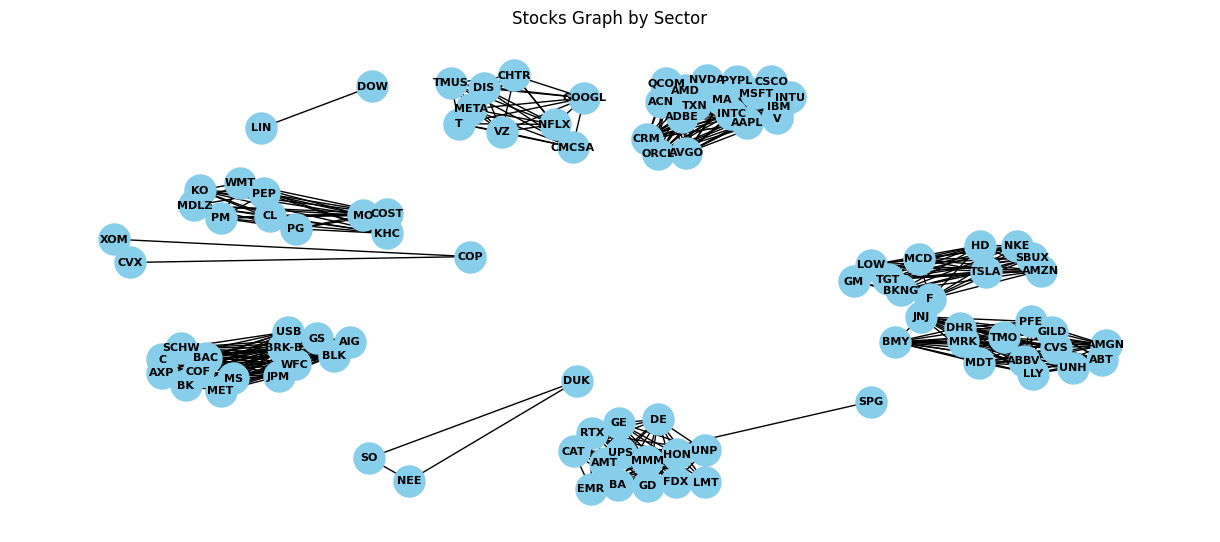

In [8]:
sector_adjacency = np.array([
    [sp100_df.loc[s1, 'Sector'] == sp100_df.loc[s2, 'Sector'] and (s1 != s2) for s1 in sp100_df.index]
    for s2 in sp100_df.index
]).astype(int)

sector_graph = nx.from_numpy_array(sector_adjacency)
sector_graph = nx.relabel_nodes(sector_graph, dict(enumerate(sp100_df.index)))

plt.figure(figsize=(12, 5))
nx.draw(sector_graph, with_labels=True, node_size=500, node_color='skyblue',
        font_size=8, font_weight='bold', font_color='black',
        pos=nx.spring_layout(sector_graph, k=0.5))
plt.title('Stocks Graph by Sector')
plt.show()

In [2]:
norm_fundamentals = pd.read_csv('datasets/fundamentals.csv').set_index("Symbol")
norm_fundamentals.head(10)


,marketCap,trailingPE,forwardPE,pegRatio,priceToBook,trailingEps,forwardEps,bookValue,payoutRatio,beta,fiveYearAvgDividendYield,52WeekChange,averageVolume,enterpriseToRevenue,profitMargins
Symbol,,,,,,,,,,,,,,,
AAPL,4.756233,-0.076554,0.897750,0.239086,0.508115,-0.198375,-0.294428,-0.100833,-0.469904,0.725755,-0.958954,-0.479303,3.287058,0.532988,0.738303
ABBV,-0.069478,0.503670,-0.598612,0.179432,0.445301,-0.404313,-0.071446,-0.100840,1.189561,-1.026923,1.212553,-0.351215,-0.368369,0.285018,-0.401171
ABT,-0.261893,0.034455,0.248476,0.320717,-0.212373,-0.413674,-0.390716,-0.100393,0.036754,-0.614221,-0.444183,-0.851392,-0.367018,-0.006767,-0.181697
ACN,-0.241220,-0.110610,0.616133,0.493398,-0.160579,0.109862,-0.023072,-0.099869,-0.177613,0.576869,-0.598022,-0.424167,-0.551568,-0.337079,-0.410635
ADBE,-0.197768,0.441783,0.650650,0.072683,-0.010822,0.072419,0.310940,-0.100096,-0.621586,0.770160,-1.319886,0.466563,-0.483418,1.125246,0.572562
AIG,-0.505535,-0.595963,-1.001325,-0.200468,-0.286405,-0.180991,-0.264482,-0.099328,-0.402952,0.106702,0.188927,0.794970,-0.463488,-0.652282,-0.478080
AMD,-0.147255,5.650157,1.032977,0.000471,-0.220076,-0.582168,-0.369523,-0.100080,-0.621586,1.760122,-1.390889,0.716286,3.125969,1.091441,-0.857333
AMGN,-0.293414,0.380228,-0.387403,0.320717,0.389555,-0.160263,0.312783,-0.100719,0.632410,-1.011251,0.366434,0.328511,-0.545991,0.506360,-0.272542
AMT,-0.441795,0.313375,1.140602,-0.294658,0.142310,-0.332770,-0.320688,-0.100736,0.502367,-0.734375,-0.059583,-0.819739,-0.559590,1.433273,0.150457


In [3]:
def get_clusters(data: np.ndarray, n_clusters: int) -> np.ndarray:
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit(data).labels_


In [ ]:
spearman_corr = norm_fundamentals.transpose().corr(method="spearman")
spearman_corr = spearman_corr - (spearman_corr == 1)
spearman_corr.head(10)


Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,-0.439286,0.253571,0.128571,0.275000,-0.639286,0.428571,-0.603571,0.017857,0.560714,...,0.089286,-0.185714,0.078571,-0.410714,-0.407143,0.621429,-0.289286,-0.075000,0.232143,-0.139286
ABBV,-0.439286,0.000000,0.275000,-0.403571,-0.489286,-0.053571,-0.250000,0.839286,0.421429,-0.328571,...,0.075000,0.178571,-0.464286,0.371429,0.078571,-0.260714,0.600000,-0.228571,0.078571,0.139286
ABT,0.253571,0.275000,0.000000,0.321429,0.071429,-0.650000,0.139286,0.278571,0.735714,0.003571,...,0.564286,0.182143,0.103571,0.039286,-0.385714,0.417857,0.121429,-0.564286,0.428571,-0.289286
ACN,0.128571,-0.403571,0.321429,0.000000,0.382143,-0.060714,0.214286,-0.278571,0.053571,0.128571,...,0.164286,0.353571,0.378571,0.303571,-0.460714,0.242857,-0.428571,-0.414286,0.085714,-0.153571
ADBE,0.275000,-0.489286,0.071429,0.382143,0.000000,-0.257143,0.453571,-0.160714,0.153571,0.128571,...,0.410714,-0.367857,0.778571,-0.492857,-0.171429,0.642857,-0.764286,-0.142857,-0.282143,-0.721429
AIG,-0.639286,-0.053571,-0.650000,-0.060714,-0.257143,0.000000,-0.289286,-0.007143,-0.635714,-0.257143,...,-0.314286,-0.075000,0.021429,0.446429,0.685714,-0.600000,0.289286,0.660714,-0.253571,0.535714
AMD,0.428571,-0.250000,0.139286,0.214286,0.453571,-0.289286,0.000000,-0.232143,-0.117857,0.746429,...,-0.132143,-0.132143,-0.035714,-0.335714,-0.357143,0.182143,-0.239286,-0.171429,0.364286,-0.282143
AMGN,-0.603571,0.839286,0.278571,-0.278571,-0.160714,-0.007143,-0.232143,0.000000,0.521429,-0.453571,...,0.214286,0.092857,-0.103571,0.192857,0.114286,-0.128571,0.371429,-0.310714,-0.107143,-0.210714
AMT,0.017857,0.421429,0.735714,0.053571,0.153571,-0.635714,-0.117857,0.521429,0.000000,-0.360714,...,0.717857,-0.082143,0.178571,0.021429,-0.271429,0.350000,-0.089286,-0.646429,-0.028571,-0.542857


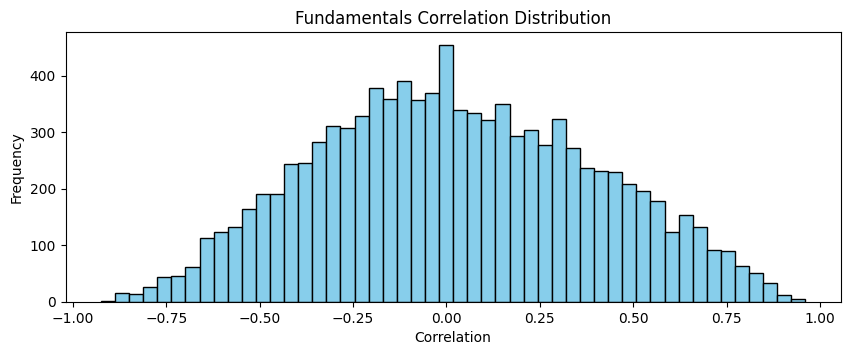

In [9]:
plt.figure(figsize=(10, 3.5))
plt.hist(spearman_corr.values.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Fundamentals Correlation Distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()


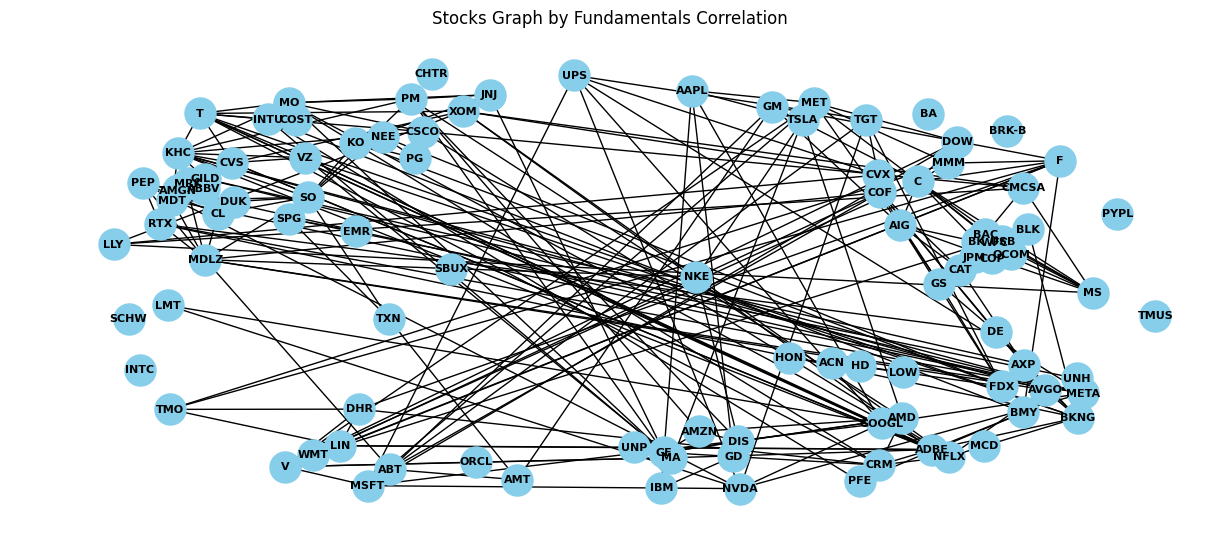

In [10]:
corr_matrix_np = spearman_corr.to_numpy()
adj_corr_matrix = corr_matrix_np * (abs(corr_matrix_np) > 0.7).astype(int)

corr_graph = nx.from_numpy_array(adj_corr_matrix)
corr_graph = nx.relabel_nodes(corr_graph, dict(enumerate(spearman_corr.index)))

plt.figure(figsize=(12, 5))
nx.draw(corr_graph, with_labels=True, node_size=500, node_color='skyblue',
        font_size=8, font_weight='bold', font_color='black',
        pos=nx.spring_layout(corr_graph))
plt.title('Stocks Graph by Fundamentals Correlation')
plt.show()


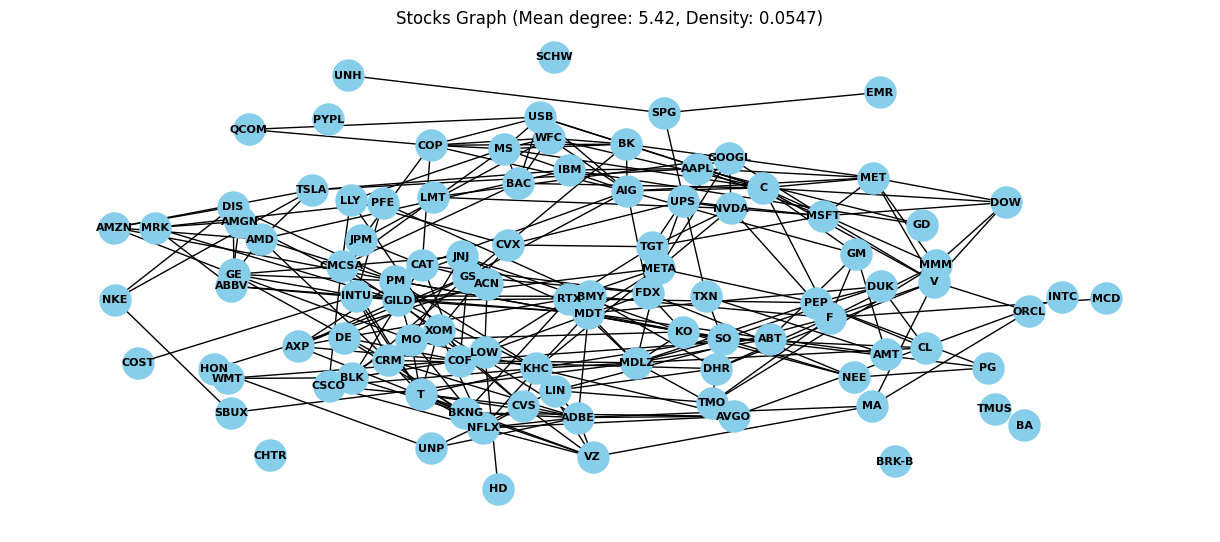

In [11]:
corr_threshold, sector_bonus = 0.7, 0.05

sector_matrix = pd.get_dummies(sp100_df[["Sector"]]).T.corr().to_numpy().astype(int) - np.eye(len(sp100_df), dtype=int)
combined_adj = abs(corr_matrix_np) + sector_matrix * sector_bonus
combined_adj = combined_adj * (abs(combined_adj) > corr_threshold)
combined_adj = combined_adj / combined_adj.max()

combined_graph = nx.from_numpy_array(combined_adj)
combined_graph = nx.relabel_nodes(combined_graph, dict(enumerate(sp100_df.index)))

plt.figure(figsize=(12, 5))
nx.draw(combined_graph, with_labels=True, node_size=500, node_color='skyblue',
        font_size=8, font_weight='bold', font_color='black',
        pos=nx.spring_layout(combined_graph, k=0.5))

plt.title(f'Stocks Graph (Mean degree: {np.mean([d for _, d in combined_graph.degree]):.2f}, Density: {nx.density(combined_graph):.4f})')
plt.show()


In [ ]:
np.save('datasets/adj.npy', combined_adj)


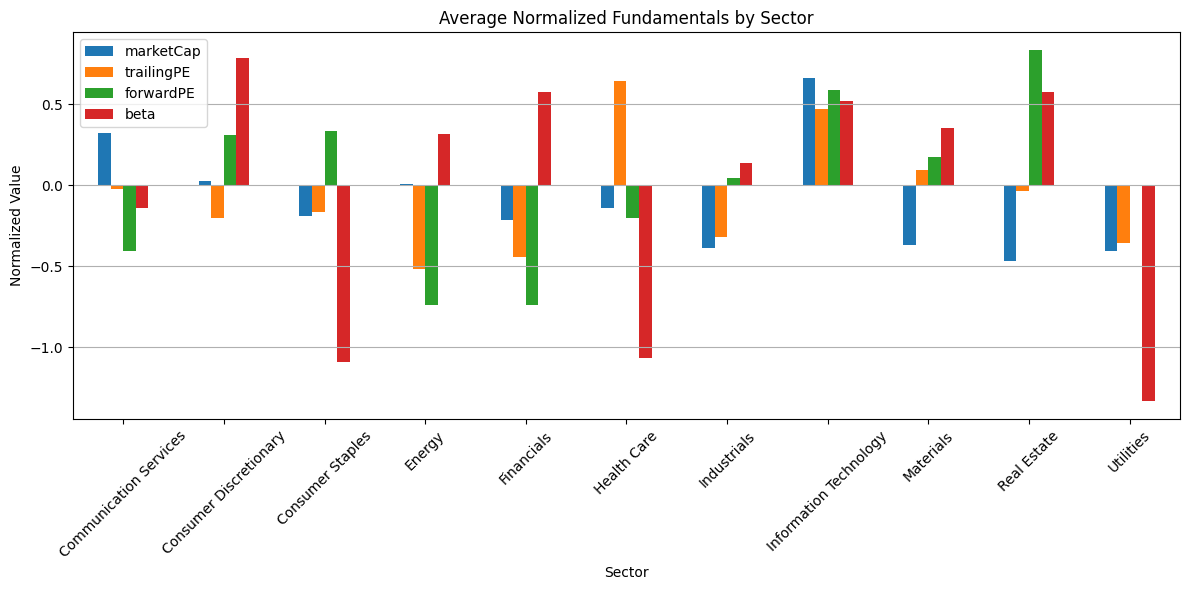

In [ ]:
merged_df = norm_fundamentals.join(sp100_df["Sector"])

sector_means = merged_df.groupby("Sector").mean()

sector_means[["marketCap", "trailingPE", "forwardPE", "beta"]].plot(kind="bar", figsize=(12, 6))
plt.title("Average Normalized Fundamentals by Sector")
plt.ylabel("Normalized Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


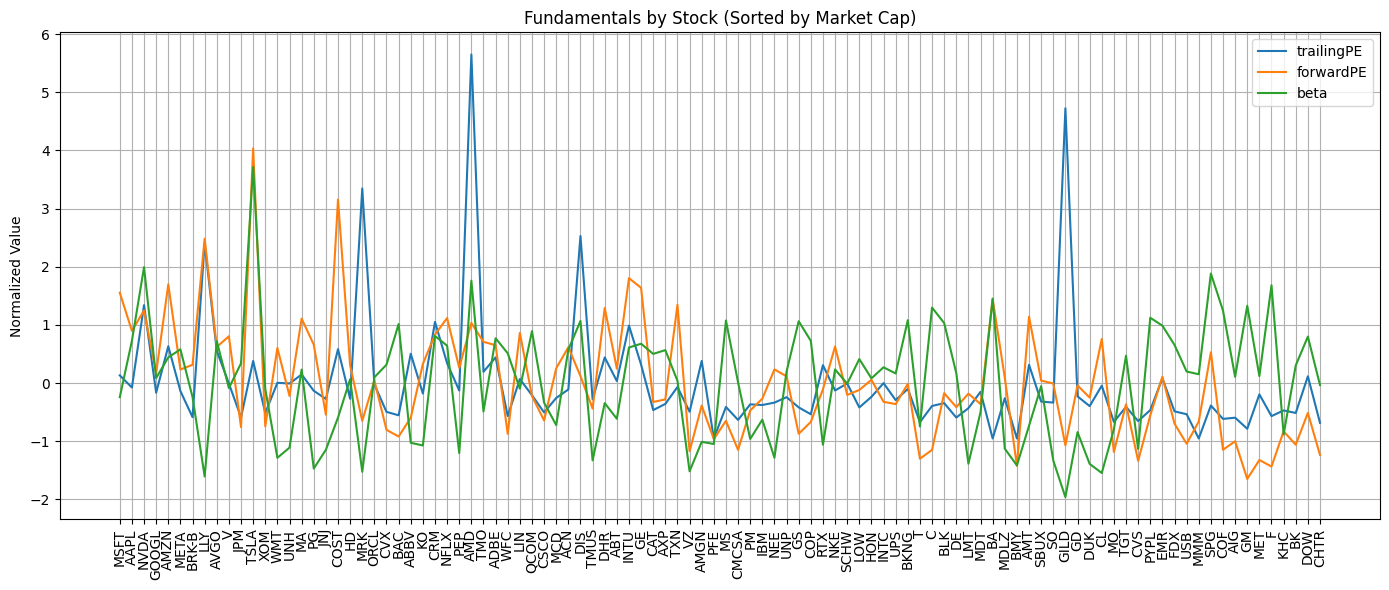

In [ ]:
sorted_df = norm_fundamentals.sort_values("marketCap", ascending=False)

plt.figure(figsize=(14, 6))
for col in ["trailingPE", "forwardPE", "beta"]:
    plt.plot(sorted_df.index, sorted_df[col], label=col)

plt.title("Fundamentals by Stock (Sorted by Market Cap)")
plt.xticks(rotation=90)
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


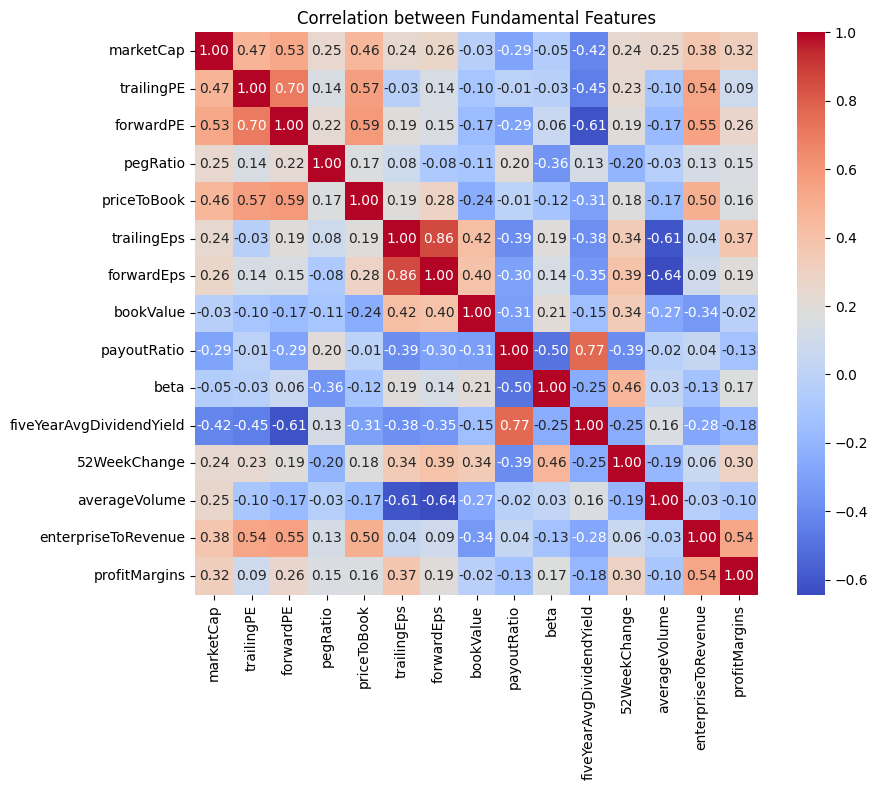

In [ ]:
import seaborn as sns

corr_matrix = norm_fundamentals.corr(method="spearman")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation between Fundamental Features")
plt.tight_layout()
plt.show()


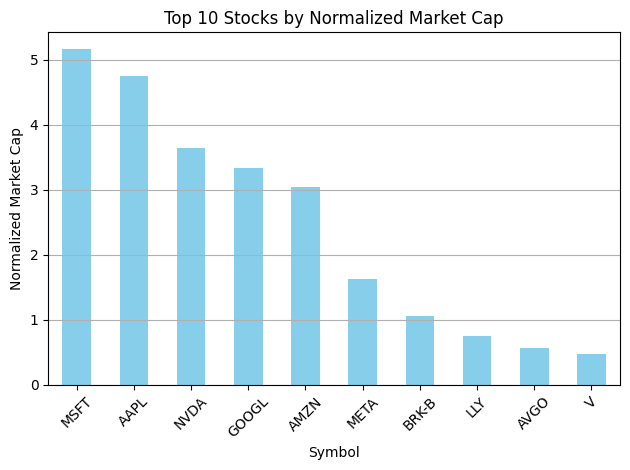

In [15]:
top_marketcap = norm_fundamentals["marketCap"].sort_values(ascending=False).head(10)

top_marketcap.plot(kind="bar", color="skyblue")
plt.title("Top 10 Stocks by Normalized Market Cap")
plt.ylabel("Normalized Market Cap")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
